In [1]:
import os
import difflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches as mpatches

import sys
sys.path.append('../../')
from rllte.evaluation.visualization import _annotate_and_decorate_axis, plot_interval_estimates
from rllte.evaluation import Performance
from utils import *

Disagreement: (5, 1000)
ICM: (5, 1000)
RND: (5, 1000)
Extrinsic: (5, 1000)


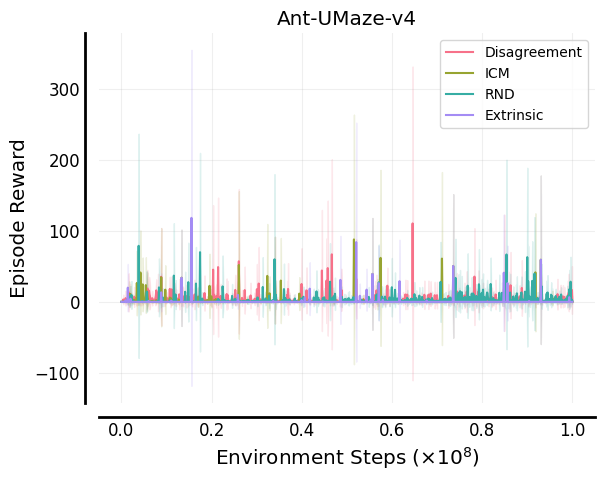

In [10]:
algos = ['Disagreement', 'ICM', 'RND', 'Extrinsic']
colors = sns.husl_palette(len(algos))
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(algos)]

all_data = {algo: [] for algo in algos}

for algo in algos:
    root = f"./data/sac_rllte/{algo.lower()}"
    for dir in os.listdir(root):
        if algo.lower() in dir:
            file = f"{root}/{dir}"
            data = pd.read_csv(file)['Value']
            # data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
            all_data[algo].append(data)

    all_data[algo] = np.array(all_data[algo])
    print(f"{algo}: {all_data[algo].shape}")

fig, ax = plt.subplots()
xticks = np.linspace(0, 1, 1000)
for algo_idx, algo in enumerate(algos):
    mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
    ax.plot(xticks, mean, label=algos[algo_idx], color=colors[algo_idx])
    ax.fill_between(xticks, mean - std, mean + std, alpha=0.15, color=colors[algo_idx])
    ax.set_title('Ant-UMaze-v4', fontsize="x-large")

ax = _annotate_and_decorate_axis(ax,
                                     ticklabelsize="large",
                                     xticklabels=xticks,
                                        xlabel=r"Environment Steps ($\times 10^8$)", 
                                        ylabel="Episode Reward",
                                        )

# fig.legend(fake_patches, algos, loc='upper center', 
#     fancybox=True, ncol=len(algos), 
#     fontsize='x-large',
#     bbox_to_anchor=(0.5, 1.0))
plt.legend()
fig.savefig('figure_ant_curves.pdf', bbox_inches='tight', dpi=300, transparent=True)